# **Imports**

In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Input

In [2]:
files = glob.glob('../trained_networks/MSDnet_Au_fcc_CeO2_MTF2_22112022/*.log')

print(files)
#df = pd.read_csv(files[0])
for i,file in enumerate(files):
    data = np.genfromtxt(file, dtype=None, names=True)
    if i == 0:
        df = pd.DataFrame(data)
    else:
        print('appending')
        df_temp = pd.DataFrame(data)
        df = df.append(df_temp,ignore_index=True)
df

['../trained_networks/MSDnet_Au_fcc_CeO2_MTF2_22112022/20221122-172926.log']


loss  val_loss  accuracy  val_accuracy  precision_0  val_precision_0  \
0    0.253336  0.139502  0.901863      0.946361     0.829553         0.912157   
1    0.139812  0.126370  0.944755      0.947680     0.904702         0.933616   
2    0.108895  0.115962  0.956984      0.955229     0.925907         0.945224   
3    0.103633  0.112145  0.958199      0.955459     0.926460         0.926155   
4    0.090192  0.090419  0.963411      0.963151     0.936475         0.952032   
..        ...       ...       ...           ...          ...              ...   
295  0.023086  0.047141  0.990311      0.983328     0.982386         0.983798   
296  0.021721  0.038615  0.990876      0.985296     0.983386         0.984491   
297  0.022005  0.044292  0.990748      0.985473     0.982944         0.980382   
298  0.021625  0.054137  0.990873      0.981760     0.983177         0.971260   
299  0.020818  0.055021  0.991220      0.982089     0.983946         0.978128   

     recall_0  val_recall_0  
0    0.793905      0.873999  
1    0.885500      0.857078  
2    0.911196      0.875435  
3    0.915496      0.896615  
4    0.925435      0.899267  
..        ...           ...  
295  0.981220      0.951780  
296  0.982238      0.958265  
297  0.982207      0.961534  
298  0.982503      0.955811  
299  0.982999      0.950867  

[300 rows x 8 columns]

In [3]:
df.keys()

Index(['loss', 'val_loss', 'accuracy', 'val_accuracy', 'precision_0',
       'val_precision_0', 'recall_0', 'val_recall_0'],
      dtype='object')

In [4]:
prec_1 = df['precision_0'].to_numpy()
rec_1 = df['recall_0'].to_numpy()

dice_1 = 2*prec_1*rec_1 / (prec_1 + rec_1)

val_prec_1 = df['val_precision_0'].to_numpy()
val_rec_1 = df['val_recall_0'].to_numpy()

val_dice_1 = 2*val_prec_1*val_rec_1 / (val_prec_1 + val_rec_1)

In [5]:
files = glob.glob('../trained_networks/Unet_Au_fcc_CeO2_MTF2_22112022/*.log')

print(files)
#df = pd.read_csv(files[0])
for i,file in enumerate(files):
    data = np.genfromtxt(file, dtype=None, names=True)
    if i == 0:
        df2 = pd.DataFrame(data)
    else:
        print('appending')
        df_temp = pd.DataFrame(data)
        df2 = df2.append(df_temp,ignore_index=True)
df2

['../trained_networks/Unet_Au_fcc_CeO2_MTF2_22112022/20221204-220553.log']


loss  val_loss  accuracy  val_accuracy  precision_0  val_precision_0  \
0    0.402591  1.008764  0.828101      0.826995     0.684796         0.963222   
1    0.205863  0.154773  0.917444      0.938644     0.855924         0.907059   
2    0.143878  0.151484  0.942950      0.930919     0.905009         0.815282   
3    0.121739  0.110089  0.951934      0.957176     0.915395         0.919938   
4    0.102513  0.096881  0.960106      0.959757     0.935287         0.966433   
..        ...       ...       ...           ...          ...              ...   
295  0.017736  0.060689  0.992500      0.979805     0.986248         0.983102   
296  0.015875  0.072983  0.993327      0.978010     0.988020         0.985765   
297  0.016547  0.077509  0.992975      0.977925     0.986888         0.984298   
298  0.015727  0.108871  0.993312      0.972897     0.987514         0.988843   
299  0.014905  0.073415  0.993671      0.977931     0.988178         0.985116   

     recall_0  val_recall_0  
0    0.654553      0.334916  
1    0.829064      0.842592  
2    0.877637      0.943235  
3    0.902696      0.913650  
4    0.913457      0.872122  
..        ...           ...  
295  0.985591      0.936246  
296  0.986837      0.928665  
297  0.986659      0.928382  
298  0.987344      0.903545  
299  0.988006      0.928720  

[300 rows x 8 columns]

In [6]:
prec_2 = df2['precision_0'].to_numpy()
rec_2 = df2['recall_0'].to_numpy()

dice_2 = 2*prec_2*rec_2 / (prec_2 + rec_2)

val_prec_2 = df2['val_precision_0'].to_numpy()
val_rec_2 = df2['val_recall_0'].to_numpy()

val_dice_2 = 2*val_prec_2*val_rec_2 / (val_prec_2 + val_rec_2)

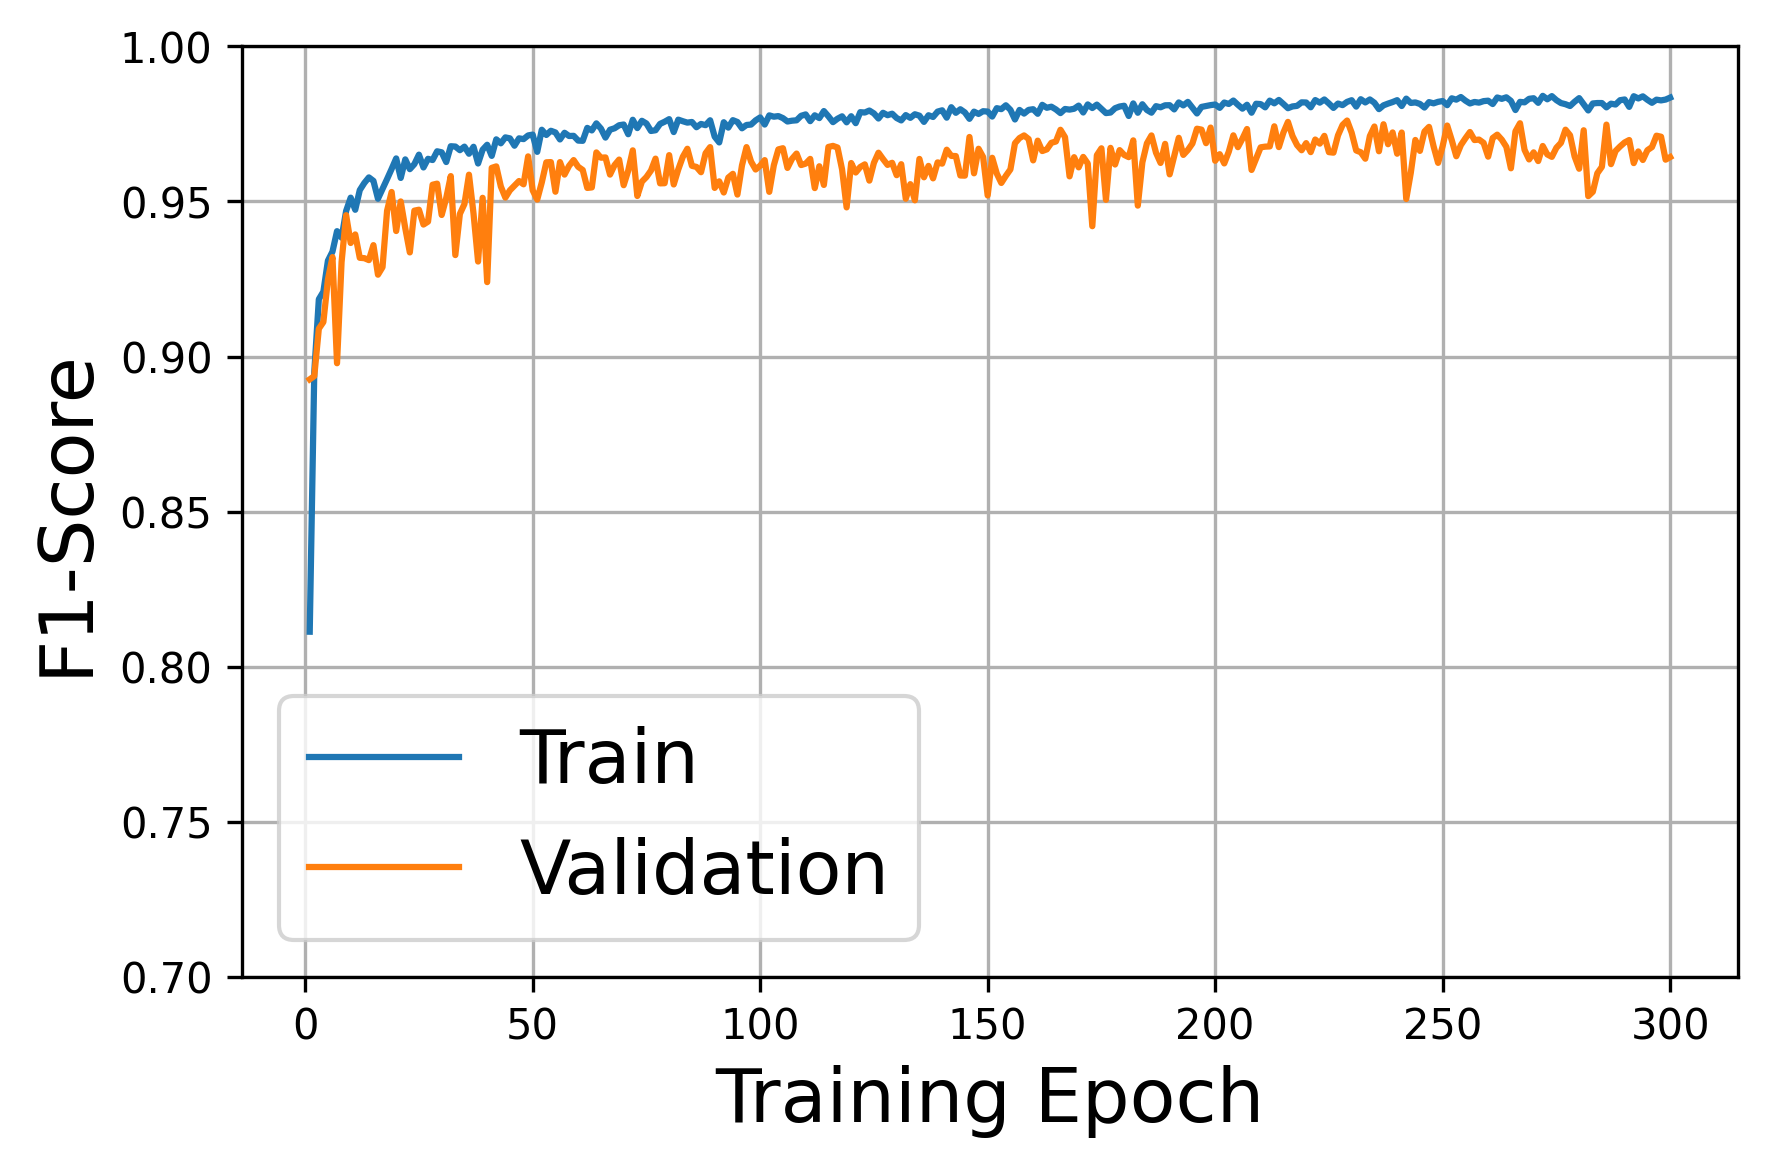

In [7]:
x = np.arange(1,301)
plt.figure()

plt.plot(x, dice_1, label='Train')
plt.plot(x, val_dice_1, label='Validation')
plt.xlabel('Training Epoch', fontsize=18)
plt.ylabel('F1-Score', fontsize=18)

plt.ylim([0.7,1.0])
plt.grid()
plt.legend(fontsize=18)
plt.tight_layout()
plt.gcf().set_dpi(300)
# plt.savefig('MSDnet_MTF5_learningcurve.png')
plt.show()

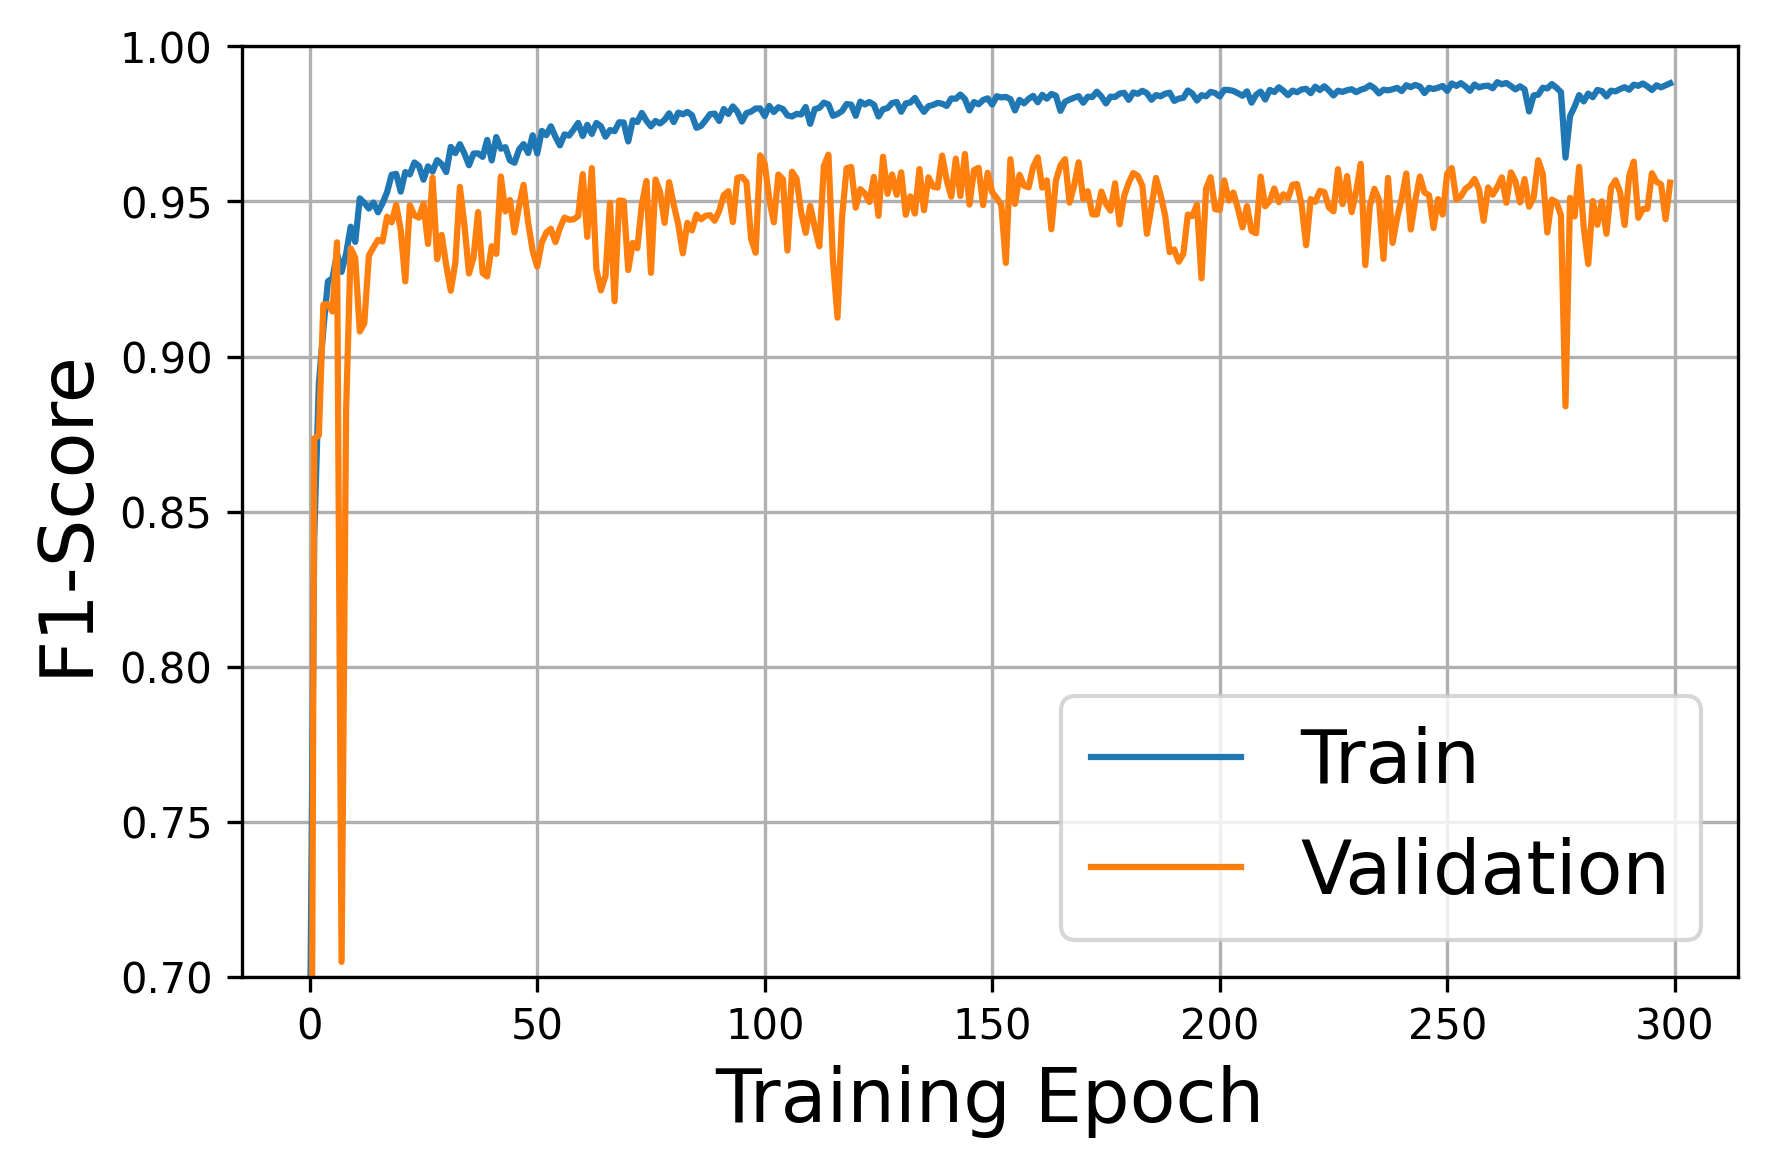

In [8]:
x = np.arange(1,301)
plt.figure()

plt.plot(dice_2, label='Train')
plt.plot(val_dice_2, label='Validation')
plt.xlabel('Training Epoch', fontsize=18)
plt.ylabel('F1-Score', fontsize=18)

plt.ylim([0.7,1.0])
plt.grid()
plt.legend(fontsize=18)
plt.tight_layout()
plt.gcf().set_dpi(300)
# plt.savefig('Unet_MTF4_lowdose_learningcurve.png')
plt.show()

270


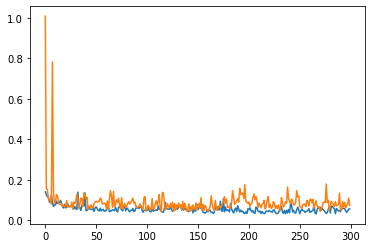

In [9]:
plt.plot(df['val_loss'].to_list())
plt.plot(df2['val_loss'].to_list())
print(np.argmin(df2['val_loss']))

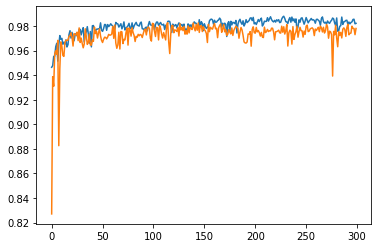

In [10]:
plt.plot(df['val_accuracy'].to_list())
plt.plot(df2['val_accuracy'].to_list())